***Detailed Explaination of all the columns***
1. **Name**: This could be the name or model of the car. While it might not directly impact the selling price, certain car models might have different reputations, features, or desirability, which can influence the price.

2. **Year**: The manufacturing year of the car. Generally, newer cars tend to have higher selling prices because they are likely to have fewer miles on the odometer, more advanced features, and a more contemporary design.

3. **Selling Price**: This is the actual price at which the seller intends to sell the car. This is the target value that's influenced by all the other columns.

4. **Kilometers Driven (km_driven)**: The distance the car has been driven in kilometers. Generally, lower mileage cars tend to have higher selling prices since they are perceived to have less wear and tear, potentially implying better overall condition.

5. **Fuel Type (fuel)**: The type of fuel the car uses, such as gasoline, diesel, electric, or hybrid. Fuel efficiency, fuel costs, and environmental considerations can impact the price. For example, fuel-efficient cars might have higher demand and therefore higher prices.

6. **Seller Type**: This refers to who is selling the car. It could be an individual seller, a dealership, or some other entity. Dealerships might sell cars at slightly higher prices due to the assurance of better quality and potential warranties.

7. **Transmission**: The type of transmission the car has, such as automatic or manual. Automatic transmissions tend to be more popular and might lead to higher prices due to convenience.

8. **Owner**: The number of previous owners the car has had. Generally, cars with fewer owners are considered more desirable and could have higher prices.


In summary, the selling price of a used car is influenced by a combination of factors. Newer cars with lower mileage, better fuel efficiency, popular fuel types, automatic transmissions, fewer owners, reputable brands, and desirable models tend to command higher prices. Conversely, cars with older model years, higher mileage, manual transmissions, less efficient fuel types, more owners, and lesser-known brands/models might have lower selling prices. It's important to note that these factors interact in complex ways, and other external market factors can also play a role in determining the final selling price.

In [92]:
# Import all the libraries
import pandas as pd
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
import numpy as np
%matplotlib inline

In [93]:
# Load the dataset
df = pd.read_csv('CAR DETAILS FROM CAR DEKHO (1).csv')

In [94]:
# Showing data
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [48]:
# Finding duplicate value
df.duplicated().sum()

763

There are total ***763*** duplicate values present in the dataset

In [96]:
# Remove all the duplicate values
df.drop_duplicates(inplace = True)

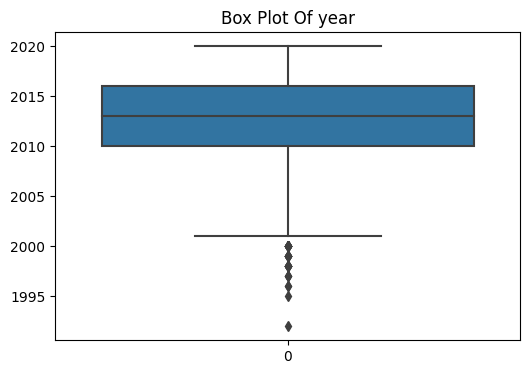

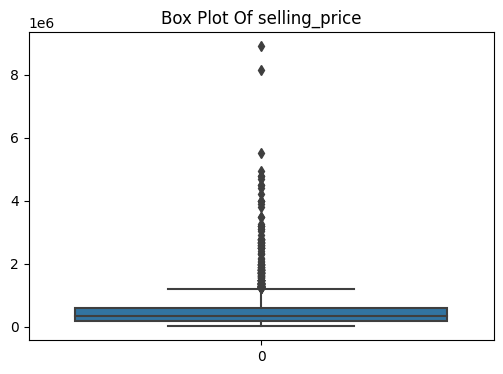

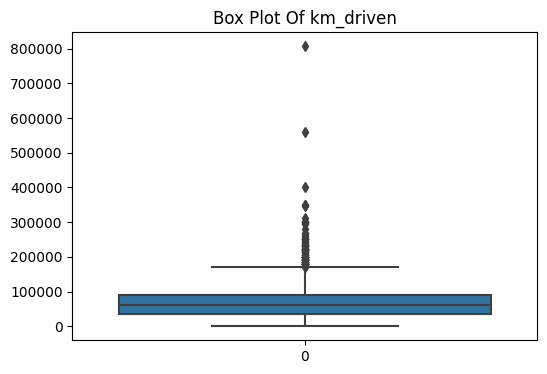

In [97]:
# Finding outliers 
df_data = df.select_dtypes(include = np.number)
for i in df_data:
    plt.figure(figsize = (6,4))
    sns.boxplot(df_data[i])
    plt.title(f"Box Plot Of {i}")
    plt.show()

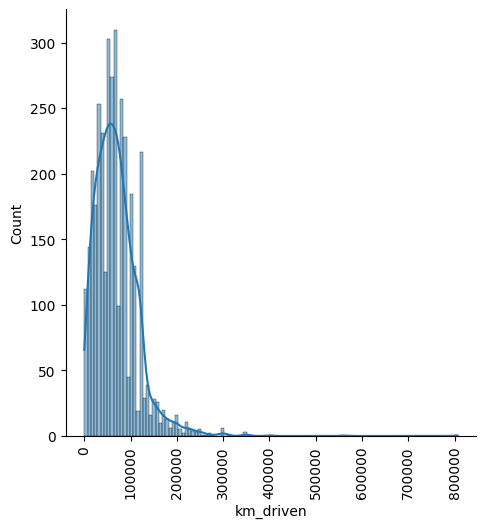

In [98]:
# Showing km_driven column skewness
sns.displot(data = df,x = 'km_driven',kde = True)
plt.xticks(rotation = 90)
plt.show()
# It is right skewed

In [99]:
# Filtering the data and droping the outliers from the columns 
fil = df[df['km_driven']>200000]
fil.index.tolist()
df['km_driven'].drop([69, 70, 197,225,324,394, 502,525, 656,821,1101, 1116, 1243,1253, 1414,
                      1426,1659,1668,1674,1923, 2278,2394,2401,2402, 2672,2760,2855,2955, 2961,
                      2964,3171,3447,3461,3470,3531, 3541,3572,3611,3675, 3679, 3718, 3734,3782,3787,3898,3979,
                      3981,3994, 4088,4208,4231,4255,4286],inplace = True)

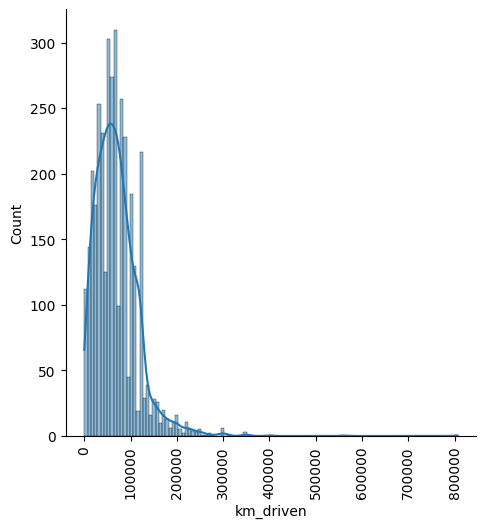

In [100]:
# Graph after removing the outliers from the column
sns.displot(data = df,x = 'km_driven',kde = True)
plt.xticks(rotation = 90)
plt.show()
# It is right skewed

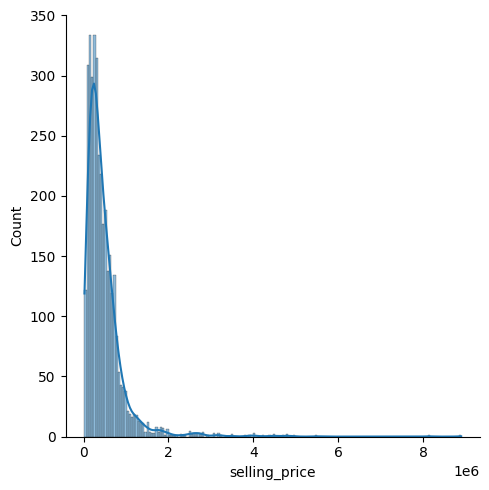

In [101]:
# Finding the skeness of the selling price (Before removing the outliers)
sns.displot(data = df,x = 'selling_price',kde = True)
plt.savefig('SellingPrice.jpeg')
plt.show()

In [103]:
# Filter the column and removing the outliers
filter1 = df[df['selling_price']>3000000]
df.drop([89,101, 539, 553,555, 731,963,968,988,1026,1065, 1088,1290, 1479,1705,2295,
         2503,3453,3863,3872,3873, 3875,3883,3969,4047],inplace = True)

I remove all the data those price is more than **3000000** because they all are outliers 

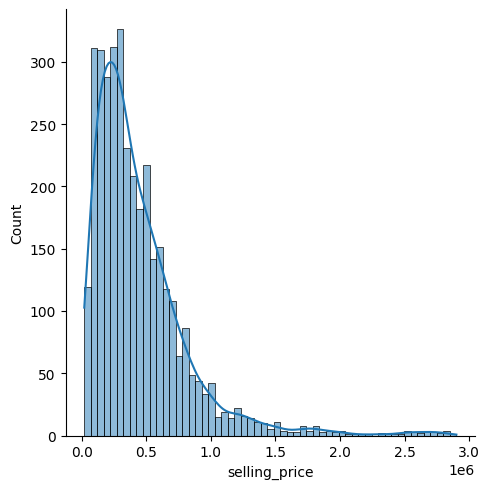

In [105]:
# After removing outliers
sns.displot(data = df,x = 'selling_price',kde = True)
plt.savefig('SellingPrice.jpeg')
plt.show()

In [106]:
df['selling_price'].describe()

count    3.552000e+03
mean     4.467850e+05
std      3.766869e+05
min      2.000000e+04
25%      2.000000e+05
50%      3.500000e+05
75%      5.877500e+05
max      2.900000e+06
Name: selling_price, dtype: float64

In [107]:
# Seperating brand names and models from the name columns 
df1 = df.copy()
df2 = df1['name'].str.split(" ",n = 3,expand = True)
df2.rename(columns = {0:'Cars',1:'Models'},inplace = True)
df = pd.concat([df,df2['Cars'],df2['Models']],axis = 1)

In [108]:
df2['Cars'].unique()

array(['Maruti', 'Hyundai', 'Datsun', 'Honda', 'Tata', 'Chevrolet',
       'Toyota', 'Jaguar', 'Mercedes-Benz', 'Audi', 'Skoda', 'Jeep',
       'BMW', 'Mahindra', 'Ford', 'Nissan', 'Renault', 'Fiat',
       'Volkswagen', 'Volvo', 'Mitsubishi', 'Daewoo', 'MG', 'Force',
       'Isuzu', 'OpelCorsa', 'Ambassador', 'Kia', 'Land'], dtype=object)

In [123]:
# Which brand cars sells the most
df.groupby('Cars')['year'].count().head(25).sort_values(ascending = False)

Cars
Maruti           1072
Hyundai           637
Mahindra          328
Ford              219
Honda             216
Chevrolet         151
Renault           110
Nissan             52
Skoda              49
Fiat               32
Datsun             29
Audi               24
BMW                20
Mercedes-Benz      16
Mitsubishi          5
Jaguar              5
Jeep                3
Ambassador          3
MG                  2
OpelCorsa           2
Land                1
Kia                 1
Isuzu               1
Force               1
Daewoo              1
Name: year, dtype: int64

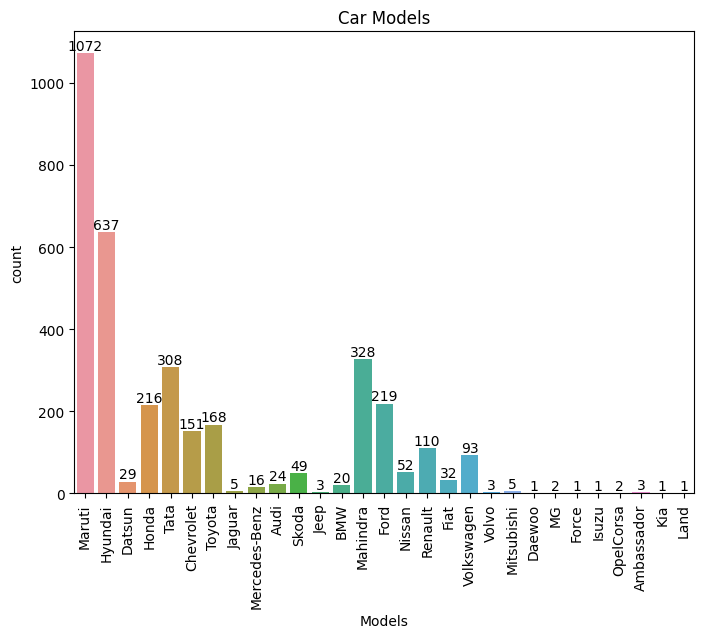

In [125]:
# Showing this by graph
plt.figure(figsize=(8, 6))
ax = sns.countplot(x = 'Cars',data = df)
for label in ax.containers:
    ax.bar_label(label)
plt.title("Car Models")
plt.xticks(rotation = 90)
plt.xlabel('Models')
plt.show()

In [129]:
# Grouping by year means in which year most of the cars was sell
df['year'].value_counts()

year
2017    342
2012    338
2015    330
2014    319
2013    298
2018    288
2016    280
2011    247
2010    209
2009    169
2019    157
2008    129
2007    117
2006     93
2005     61
2020     44
2004     38
2003     22
2002     18
2001     16
2000     12
1998      9
1999      9
1997      3
1996      2
1995      1
1992      1
Name: count, dtype: int64

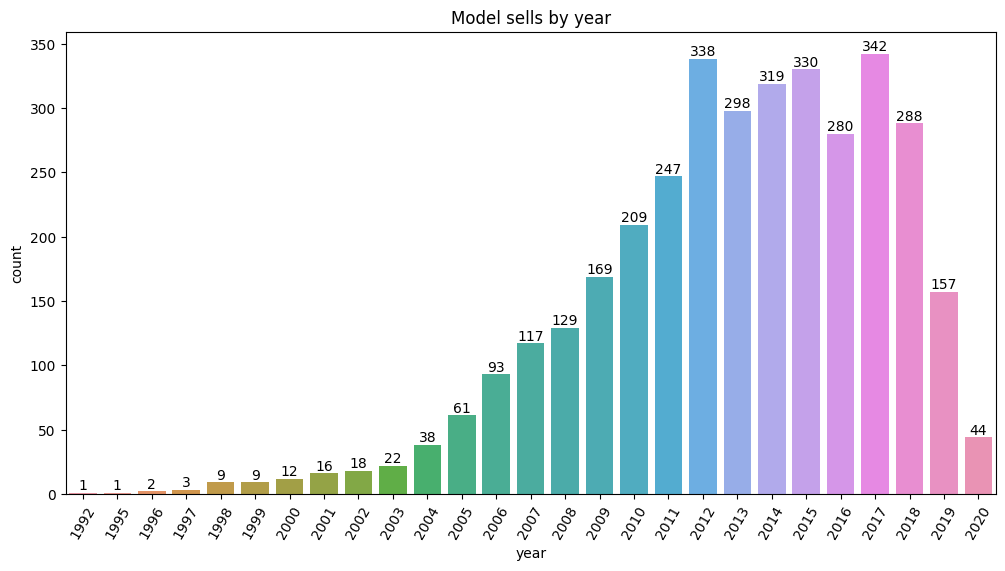

In [136]:
plt.figure(figsize=(12, 6))
ax = sns.countplot(x = 'year',data = df)
for label in ax.containers:
    ax.bar_label(label)
plt.title("Model sells by year")
plt.xticks(rotation = 60)
plt.show()

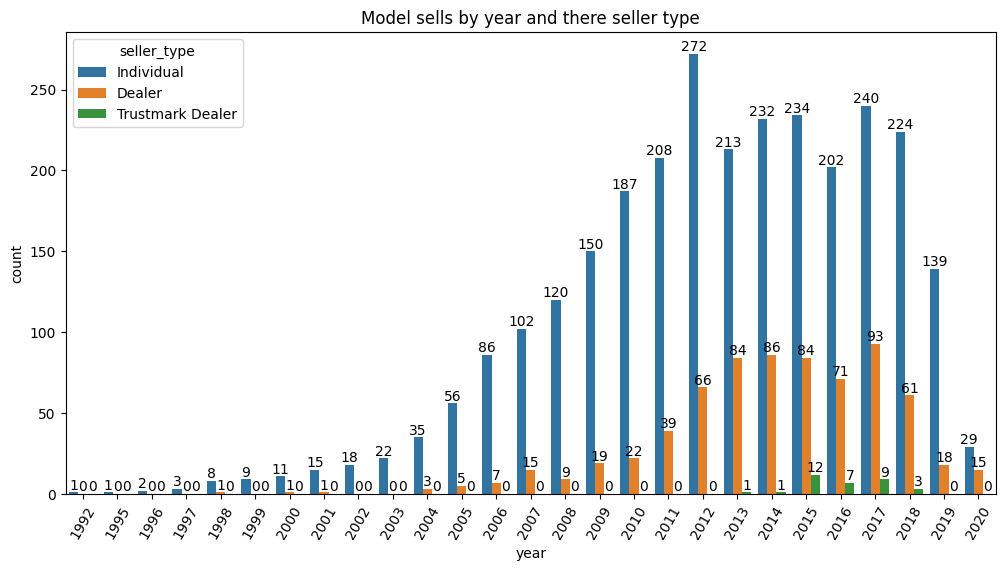

In [137]:
# sns.countplot(data = df,x = df['year'])
# 
# plt.show()

plt.figure(figsize=(12, 6))
ax = sns.countplot(x = 'year',data = df,hue = 'seller_type')
for label in ax.containers:
    ax.bar_label(label)
plt.title("Model sells by year and there seller type")
plt.xticks(rotation = 60)
plt.show()

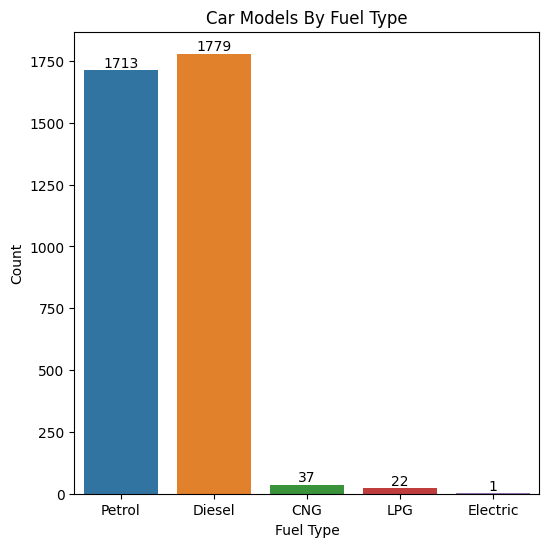

In [140]:
# Count plot to count which fuel type cars sells the most
plt.figure(figsize=(6, 6))
ax = sns.countplot(x = 'fuel',data = df)
for label in ax.containers:
    ax.bar_label(label)
plt.title("Car Models By Fuel Type")
# plt.xticks(rotation = 60)
plt.xlabel('Fuel Type')
plt.ylabel('Count')
plt.show()

**Diesel** type cars sells is most means peples loves diesel cars the most. Then **Petrol** Cars

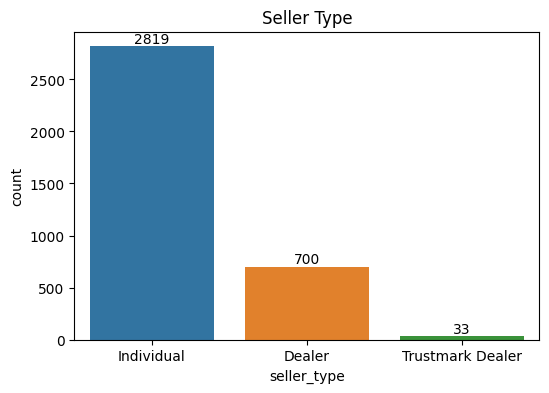

In [141]:
plt.figure(figsize=(6, 4))
ax = sns.countplot(x = 'seller_type',data = df)
for label in ax.containers:
    ax.bar_label(label)
plt.title("Seller Type")
# plt.xticks(rotation = 60)
plt.show()

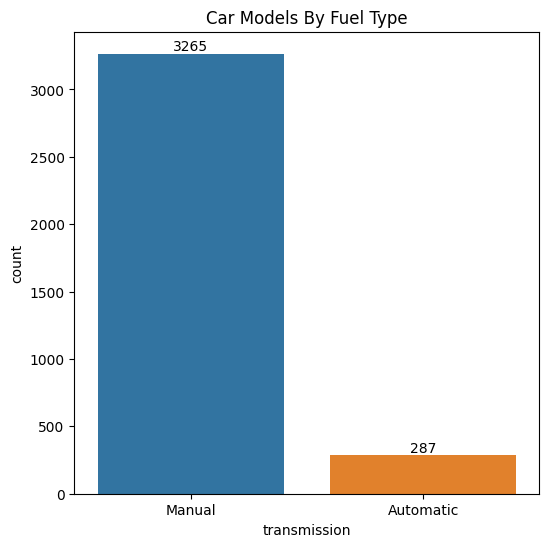

In [142]:
# Transmission column
plt.figure(figsize=(6, 6))
ax = sns.countplot(x = 'transmission',data = df)
for label in ax.containers:
    ax.bar_label(label)
plt.title("Car Models By Fuel Type")
# plt.xticks(rotation = 60)
plt.show()

People loves **Manual Cars** the most

In [144]:
y = df['owner'].value_counts()
y

owner
First Owner             2194
Second Owner             977
Third Owner              289
Fourth & Above Owner      75
Test Drive Car            17
Name: count, dtype: int64

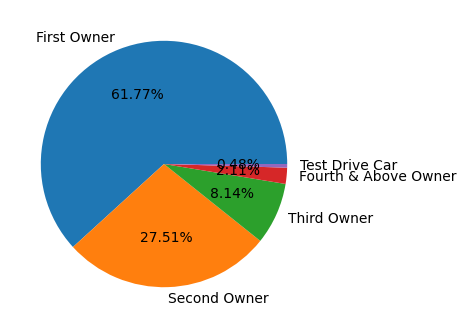

In [145]:
# Owners of the cars
plt.figure(figsize = (4,4))
plt.pie(y.tolist(),labels=y.index.tolist(),autopct='%1.2f%%')
plt.show()

## Machine Learning Part

In [146]:
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,Cars,Models
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,Maruti,800
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,Maruti,Wagon
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,Hyundai,Verna
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner,Datsun,RediGO
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner,Honda,Amaze
...,...,...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner,Hyundai,i20
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner,Hyundai,i20
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner,Maruti,800
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner,Hyundai,Creta


In [147]:
# Label Endcoding
df['fuel'] = label_encoder.fit_transform(df['fuel'])
df['seller_type'] = label_encoder.fit_transform(df['seller_type'])
df['transmission'] = label_encoder.fit_transform(df['transmission'])
df['owner'] = label_encoder.fit_transform(df['owner'])

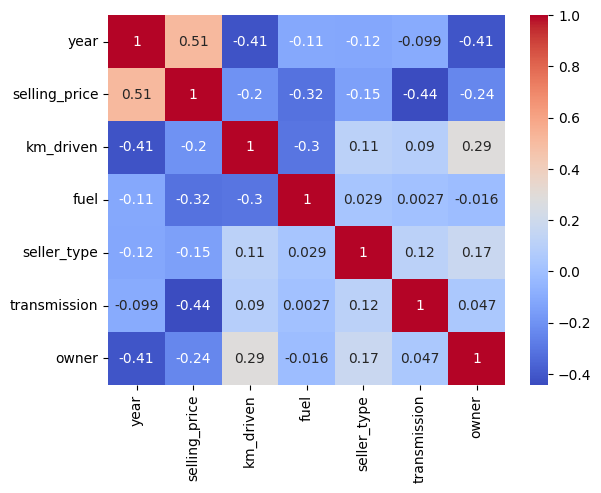

In [148]:
sns.heatmap(df.corr(numeric_only=True),annot = True,cmap = 'coolwarm')
plt.show()

In [150]:
# Selecting the dependent and Target Variable
x1 = df.drop(columns = ['selling_price', 'name','Cars','Models'])
y1 = df['selling_price']


In [151]:
# Splitting the data for training and testing 
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size = 0.3, random_state = 1)

In [152]:
# Train the model or fitting the data into the models
reg1 = linear_model.LinearRegression()
reg1.fit(x1_train, y1_train)

LinearRegression()

In [153]:
# Predicting the model
regp = reg1.predict(x1_test)

In [154]:
# RMSE Before Removing any Outlier i.e 439502.9147167556
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y1_test, regp))
print("RMSE:", rmse)

RMSE: 257995.8479704691


In [155]:
#RMSE After Removing All the Outliers i.e 257995.8479704691
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y1_test, regp))
print("RMSE:", rmse)

RMSE: 257995.8479704691


https://www.kaggle.com/gwlsaurabh/regression-on-car-data-from-car-dekho